reference: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from scipy.stats import skew, norm

import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
upload_train = files.upload()

Saving house-train.csv to house-train.csv


In [4]:
import pandas as pd
import io
train = pd.read_csv(io.BytesIO(upload_train['house-train.csv']), index_col=None)
train.shape

(1460, 81)

In [5]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

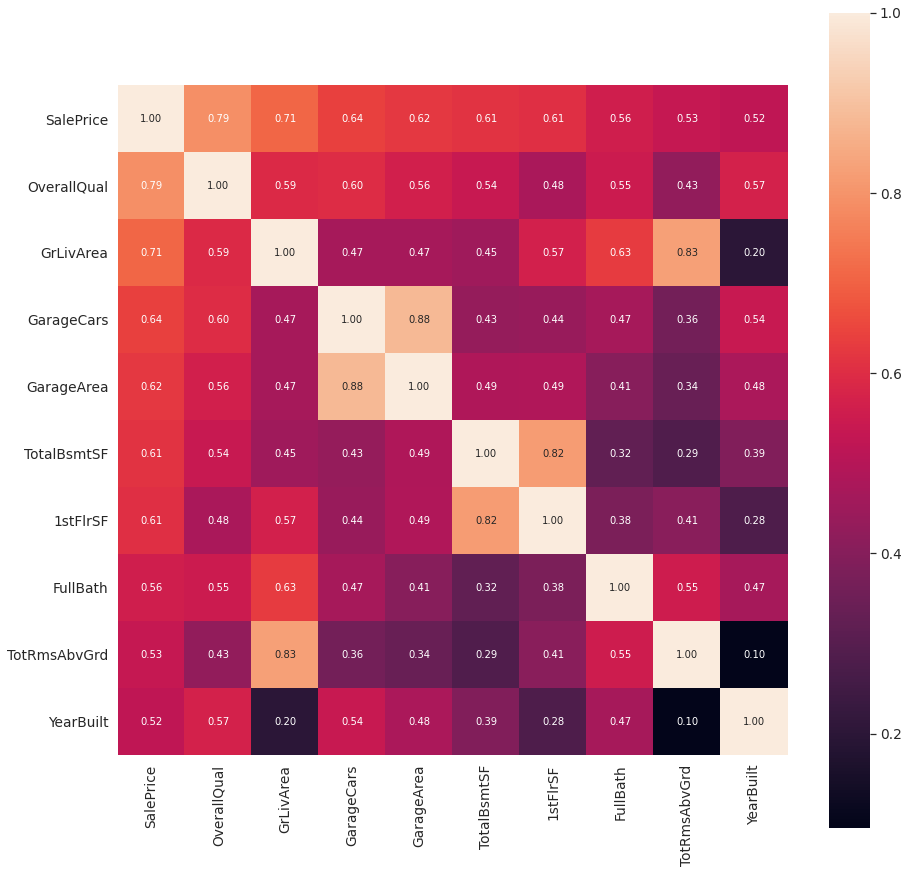

In [14]:
# number of top correlated variables to price 
k = 10
corrmat = train.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
plt.subplots(figsize=(15, 15))
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
